In [0]:
import tensorflow as tf

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data( )

In [59]:
x_train.shape # 28 * 28 is a greyscale image...need to add one more dimension

(60000, 28, 28)

In [0]:
x_train = x_train/255
x_test = x_test/255
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [61]:
x_train.shape  #Fixed

(60000, 28, 28, 1)

In [62]:
y_train.shape # this looks perfectly fine, but we need the number of classes in y_train

(60000,)

In [63]:
K = len(set(y_train)) #set returns the unique elements
print('number of classes :', K)

number of classes : 10


In [64]:
N = 8
P = 0
S = 2
((N + 2*P)/S)+1

5.0

### After first convolution : **15 * 15 * 32**
### After second convolution : **8 * 8 * 64**
### After third convolution : **5 * 5 * 128**


In [65]:
print("The size of the output before passing to dense layers is", 5 * 5 * 128)

The size of the output before passing to dense layers is 3200


# Building the CNN

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt 

In [0]:
i = Input(shape = (x_train[0].shape))
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides =  2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [0]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [75]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.5159 - accuracy: 0.8085 - val_loss: 0.4141 - val_accuracy: 0.8478
Epoch 2/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3598 - accuracy: 0.8666 - val_loss: 0.3427 - val_accuracy: 0.8709
Epoch 3/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3124 - accuracy: 0.8830 - val_loss: 0.3311 - val_accuracy: 0.8782
Epoch 4/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2823 - accuracy: 0.8933 - val_loss: 0.2977 - val_accuracy: 0.8906
Epoch 5/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2549 - accuracy: 0.9031 - val_loss: 0.2945 - val_accuracy: 0.8923
Epoch 6/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2327 - accuracy: 0.9123 - val_loss: 0.2902 - val_accuracy: 0.8964
Epoch 7/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2170 - accuracy: 0.9172 - val_loss: 0.2985 -

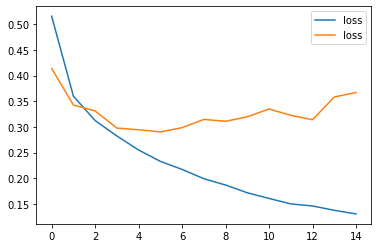

In [76]:
plt.plot(r.history['loss'],label = "loss")
plt.plot(r.history['val_loss'],label = "loss")

plt.legend()

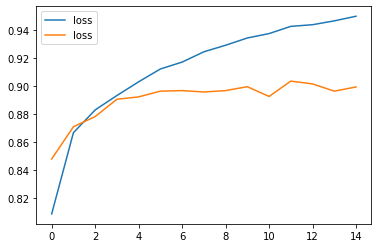

In [79]:
plt.plot(r.history['accuracy'],label = "loss")
plt.plot(r.history['val_accuracy'],label = "loss")

plt.legend()

Confusion matrix, without normalization
[[838   0  28  11   4   1 113   0   5   0]
 [  1 978   0  16   2   0   1   0   2   0]
 [ 14   1 824   8  65   0  86   0   2   0]
 [ 14   5  15 889  42   1  34   0   0   0]
 [  0   2  40  17 839   1  99   0   2   0]
 [  1   0   0   0   0 980   0  14   2   3]
 [ 97   0  48  16  73   0 758   0   8   0]
 [  0   0   0   0   0  15   0 961   0  24]
 [  5   0   6   3   5   2   8   3 968   0]
 [  1   0   0   0   0   9   0  31   0 959]]


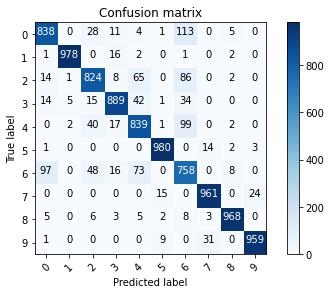

In [77]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

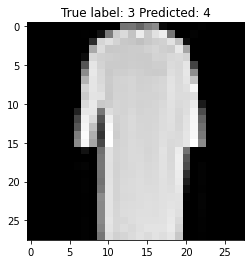

In [84]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));
